In [23]:
def pipeline(image_path, add_noise = None):
    import numpy as np
    import tensorflow as tf
    for i in [1,2,3]:
        tf.config.experimental.set_memory_growth(tf.config.get_visible_devices()[i], True)
    from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img 
    from tensorflow.keras.models import load_model
    import os
    from tqdm.notebook import tqdm_notebook as tqdm
    from skimage.io import imshow, imsave, imread
    from skimage.transform import resize
    from tensorflow.image import psnr
    from tensorflow.keras.optimizers import Adam
    import matplotlib.pyplot as plt
    import EAM_layer
    def PSNR(y_true, y_pred): 
        score = tf.image.psnr(y_true, y_pred, 1)
        return score
    n = 2
    model = load_model('model_3.h5', compile = False, custom_objects = {'EAM' : EAM_layer.eam_layer()})
    opt = Adam(0.0001)
    model.compile(opt, loss = 'mae', metrics = psnr)
    img = imread(image_path)
    img = resize(img, (256, 256))
    
    if add_noise != None:
        org_img = img.copy()
        n = 3
        noise = np.random.normal(scale = add_noise, size = (256, 256))  
        img = org_img + noise
        img = np.clip(img, 0, 1)

    pred = model.predict(np.expand_dims(img, 0))[0]
    pred = np.clip(pred, 0, 1)

    f, axes = plt.subplots(1, n)
    axes[0].imshow(img)
    axes[0].title.set_text('Noisy')
    
    axes[1].imshow(pred)
    axes[1].title.set_text('Prediction')
    
    if add_noise != None:
        axes[2].imshow(org_img)
        axes[2].title.set_text('Ground Truth')

    f.set_figwidth(12)
    f.set_figheight(12)
    f.tight_layout()
    plt.show()

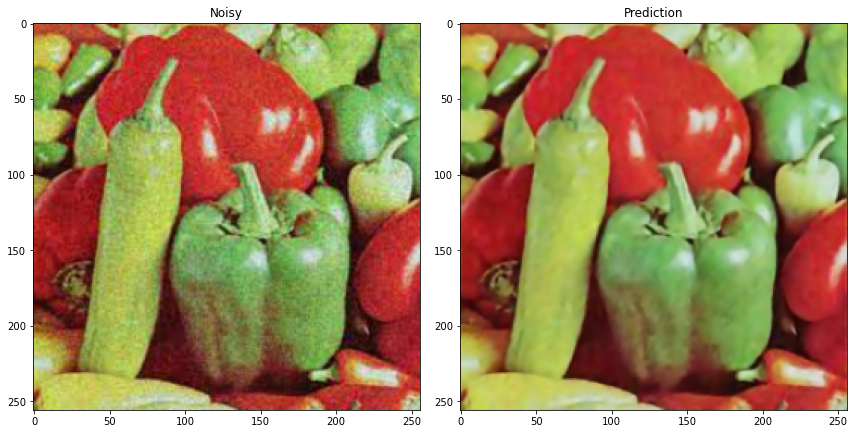

In [24]:
pipeline('test4.jpg')